In [24]:
import igraph
import powerlaw
import pylab as plt
from scipy import *
import scipy.optimize as optimize
import numpy as np
%matplotlib inline 

# Initialize the Graph object by loading the .ncol file. 
Deleting all the loops and multiple edges (if there are any) by .simplify() method.

In [65]:
g = igraph.Graph.Read_Ncol('./graphs/it_google_graphf.ncol', directed=False, names=True).simplify(combine_edges=max)

# Find community structure. 

In [66]:
community = g.community_multilevel(weights='weight')

# Explore basic network properties.

In [57]:
d = {'assortativity': g.assortativity_degree(directed=False),
     'density': g.density(loops=False),
     'w_connected': g.is_connected(mode='WEAK'),
     'transitivity': g.transitivity_undirected(mode="nan"),
     'number_vertices': g.vcount(),
     'number_edges': g.ecount(),
     'average degree': round(sum(g.degree())/g.vcount(), 3),
     'clusters_n': str(len(community))}

Write the results to the file or print them.

In [58]:
quant = open('./google_de/de_google_graphf.csv', 'a', encoding='utf-8')
for e in d:
    print(e + ': ' + str(d[e]))
    quant.write(e + ': ' + str(d[e]) + '\n')

w_connected: False
assortativity: -0.10766518979680163
transitivity: 0.008052953647246059
number_vertices: 27527
clusters_n: 1789
number_edges: 73563
density: 0.0001941723734963608
average degree: 5.345


# Plot the degree distribution of the graph

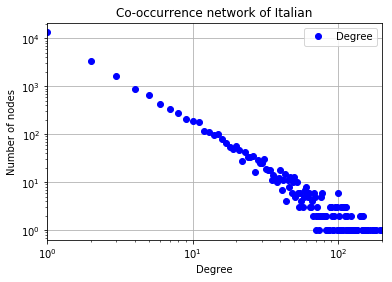

In [11]:
data = g.degree()
in_values = sorted(set(data))
in_hist = [g.degree().count(x) for x in in_values]
x = in_values
y = in_hist
xdata = x
ydata = y
plt.figure()
plt.grid(True)
plt.loglog(in_values,in_hist,'bo')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Co-occurrence network of Italian')
plt.xlim([0,2*10**2])
plt.show()
plt.savefig('./google_it/it_google_graphf.png')
plt.close()


# Fit degree distribution into power law

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


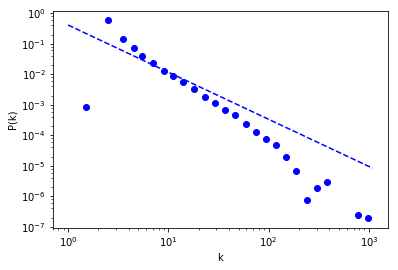

alpha =  1.54437634792 sigma =  0.00358429453352


In [12]:
fit = powerlaw.Fit(np.array(data)+1,xmin=1,discrete=True)
fit.power_law.plot_pdf(color='b', linestyle='--',label='fit ccdf')
fit.plot_pdf(color = 'b', marker='o', linestyle='')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.savefig('./google_it/it_google_graph_powerlaw.png')
plt.show()
plt.close()

print('alpha = ', fit.power_law.alpha, 'sigma = ', fit.power_law.sigma)

# Plot the graph and the community structure of the graph

In [60]:
####igraph.plot(community, 'kk_clusters_google_it.png', layout=g.layout("kk"))
##igraph.plot(g, './google_it/kk_word2vec_rus.png', layout=g.layout('kk'))
igraph.plot(community, './word2vec_rus/kk_clusters_word2vec_rus.png', layout=g.layout("kk"))
##igraph.plot(g, './word2vec_rus/drl_word2vec_rus.png', layout=g.layout('drl'))

KeyboardInterrupt: 

# Look at the words which are distributed to the same cluster

In [31]:
cluster_list = open('./google_de/de_google_clusters.txt', 'a', encoding='utf-8')
for cluster in community:
    for v in cluster[:30]:
        cluster_list.write(g.vs[v]['name'] + '\n')
    cluster_list.write('#####\n')

cluster_list.close()

Since there are a lot of clusters in the graph, it is worth taking a closer look to the biggest ones.

In [67]:
cluster_list = open('./google_it/it_google_clusterstop.txt', 'a', encoding='utf-8')
for cluster in community:
    if len(cluster) > 10: 
        for v in cluster[:30]:
            cluster_list.write(g.vs[v]['name'] + '\n')
    cluster_list.write('#####\n')


# Find out which nodes (words) have the highest degree/betweenness centrality

We print out the index of the vertex, its name (word), and the degree/the betweenness centrality measure

In [64]:
bet = open('./word2vec_rus/rus_word2vec_topbetweennes.csv', 'a', encoding='utf-8')
all_b = g.betweenness()
top20 = sorted(all_b, reverse=True)[:20]
for b in top20:
    bet.write(str(round(b)) + ';' + ', '.join(g.vs.select(_betweenness = b)["name"]) + '\n')
    print(str(round(b)) + ';' + ', '.join(g.vs.select(_betweenness = b)["name"]))
bet.close()

KeyboardInterrupt: 

In [34]:
deg = open('./google_de/de_google_topdegree.csv', 'a', encoding='utf-8')
all_d = g.degree()
top10 = sorted(all_d, reverse=True)[:20]
for d in top10:
    deg.write(str(round(d)) + ';' + ', '.join(g.vs.select(_degree = d)["name"]) + '\n')
    print(str(round(d)) + ';' + ', '.join(g.vs.select(_degree = d)["name"]))
deg.close()

4005;ist
1905;sind
1799;werden
1755;wird
1440;hat
1385;war
1039;wurde
811;haben
792;kann
576;hatte
569;sein
472;and
460;wurden
435;waren
421;können
296;sei
293;worden
285;gibt
263;Arbeit
243;Zeit


# Plot the biggest clusters. Vertices are labeled with words.

In [36]:
for vertex in g.vs():
    vertex["label"] = vertex["name"]
for c in range(len(community.membership)):
    cluster = community.subgraph(c)
    if cluster.vcount() > 20:
        name = './google_de/clusters/de_google_' + str(c) + '.png'
        igraph.plot(cluster, name, layout='drl')

IndexError: cluster index out of range

# Find word's cluster. Find word's neighbours.